In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser
import datetime
datetime
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/mercybenzaquen/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


# The following is data that I will use while I wait for the data from FORO PENAL.. So it is just practice to get an idea of what I want

In [31]:
df = pd.read_excel("project_4_chart_1_political_prisoners_unnoficial_data.xlsx")
df.head()

,Fecha de detencion,Nombre,Sitio de reclusión,Tiempo detenido,Unnamed: 4
1.0,2003-04-21,Erasmo José Bolívar (Agente de la Policia Metr...,CENAPROMIL “Ramo Verde” (Miranda),12 años preso,NaN
2.0,2003-04-21,Héctor José Rovaín (Inspector Jefe de la Polic...,CENAPROMIL “Ramo Verde” (Miranda),12 años preso,NaN
3.0,2016-08-10,Luis Molina Cerrada (Distinguido de la Policía...,CENAPROMIL “Ramo Verde” (Miranda),12 años preso,NaN
4.0,2003-04-21,Arube Pérez Salazar (Cabo 1ro de la Policía Me...,CENAPROMIL “Ramo Verde” (Miranda),12 años preso,NaN
5.0,2003-04-21,Marco Hurtado (Sub-Comisario de la Policia Met...,CENAPROMIL “Ramo Verde” (Miranda),12 años preso,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 88 entries, 1.0 to 11.0
Data columns (total 5 columns):
Fecha de detencion    87 non-null datetime64[ns]
Nombre                87 non-null object
Sitio de reclusión    87 non-null object
Tiempo detenido       77 non-null object
Unnamed: 4            0 non-null float64
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 4.1+ KB


In [4]:
dateutil.parser.parse("2003-04-21")

datetime.datetime(2003, 4, 21, 0, 0)

In [4]:
df.index = df['Fecha de detencion']


In [5]:
df['date']  = pd.to_datetime(df['Fecha de detencion'])

In [6]:
len(df['2014'])

53

In [7]:
#df.resample('M').count()

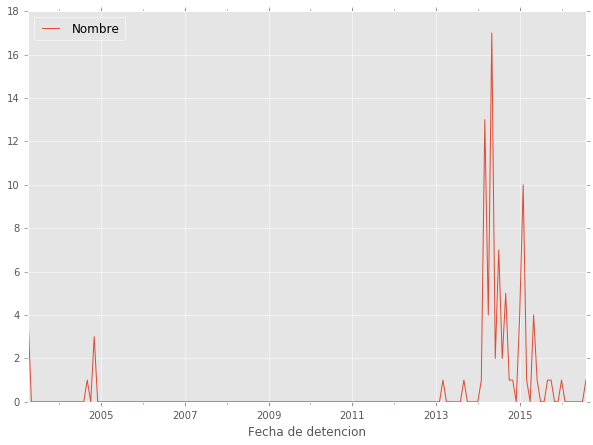

In [8]:
fig, ax = plt.subplots()
df.resample('M').count().plot(y='Nombre', figsize= (10,7), ax=ax)
plt.savefig("project4_political_prisoners.pdf", transparent=True)

In [9]:
df.resample('A').count().plot(y='Nombre', figsize= (10,7), ax=ax)

# FORO PENAL DATA
This is the biggest non-profit that has a record of political prisoners in Venezuela. I did not hear back from them so I am scrapping the data they have in their website, although I know they have additional info that would be interesting.

In [10]:
!pip3 install bs4

In [11]:
from bs4 import BeautifulSoup 

In [12]:
from urllib.request import urlopen

html_str = urlopen('https://foropenal.com/presos-politicos/lista-publica').read()

In [13]:
html_str

b'<!DOCTYPE html>\n<html lang="es" class="no-js" dir="ltr" prefix="fb: http://www.facebook.com/2008/fbml content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">\n<head>\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<link rel="profile" href="http://www.w3.org/1999/xhtml/vocab" />\n<meta name="Generator" content="Drupal 7 (http://drupal.org)" />\n<link rel="shortcut icon" href="https://foropenal.com/sites/default/files/faviconforopenal_0.ico" type="image/vnd.microsoft.icon" />\n  <title>Listado de Presos Pol\xc3\xadticos | Foro Penal Venezolano</title>\n  <link type="text/css" rel="stylesheet" 

In [14]:
document = BeautifulSoup(html_str, "html.parser")

In [15]:
document

<!DOCTYPE html>

<html class="no-js" dir="ltr" lang="es" prefix="fb: http://www.facebook.com/2008/fbml content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head>
<meta charset="utf-8">
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="http://www.w3.org/1999/xhtml/vocab" rel="profile"/>
<meta content="Drupal 7 (http://drupal.org)" name="Generator"/>
<link href="https://foropenal.com/sites/default/files/faviconforopenal_0.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<title>Listado de Presos Políticos | Foro Penal Venezolano</title>
<link href="https://foropenal.com/sites/default/files/css/css_lQaZfjVpw

In [16]:
td_class_names = document.find_all('td', {'class': 'views-field views-field-title views-align-center ultimos-detenidos-nombre'})

In [17]:
td_class_names

[<td class="views-field views-field-title views-align-center ultimos-detenidos-nombre">
 <a href="/Francisco-Javier-Lara-Marquez">Francisco Javier Márquez Lara</a> </td>,
 <td class="views-field views-field-title views-align-center ultimos-detenidos-nombre">
 <a href="/content/gabriel-salom%C3%B3n-san-miguel">Gabriel Salomón San Miguel</a> </td>,
 <td class="views-field views-field-title views-align-center ultimos-detenidos-nombre">
 <a href="/content/angel-coromoto-rodr%C3%ADguez">Angel Coromoto Rodríguez</a> </td>,
 <td class="views-field views-field-title views-align-center ultimos-detenidos-nombre">
 <a href="/node/2438">Jeremy Bastardo Lugo</a> </td>,
 <td class="views-field views-field-title views-align-center ultimos-detenidos-nombre">
 <a href="/content/jes%C3%BAs-david-chirinos-rodr%C3%ADguez">Jesús David Chirinos Rodríguez</a> </td>,
 <td class="views-field views-field-title views-align-center ultimos-detenidos-nombre">
 <a href="/content/vilca-fern%C3%A1ndez">Vilca Fernández

In [18]:
for item in td_class_names:
    names = item.find('a')
    print(names.string)

Francisco Javier Márquez Lara
Gabriel Salomón San Miguel
Angel Coromoto Rodríguez
Jeremy Bastardo Lugo
Jesús David Chirinos Rodríguez
Vilca Fernández
Javier Infante Pérez
Humberto Yusuino
Yelut Naspe Iniestra
Gustavo Junior Parra Azuaje


# Scraping all 9 pages

In [19]:
import requests 
from bs4 import BeautifulSoup

In [20]:
import pandas as pd

In [21]:
from urllib.request import urlopen

In [22]:
names_list= []

for i in range(9):
    html_str = urlopen('https://foropenal.com/presos-politicos/lista-publica?keys=&page=' + str(i)).read()
    document = BeautifulSoup(html_str, "html.parser")
    
    td_class_names = document.find_all('td', {'class': 'views-field views-field-title views-align-center ultimos-detenidos-nombre'})
    for item in td_class_names:
        names = item.find('a')
        names.string
        #print(names.string)
        names_list.append(names.string)
names_list


['Francisco Javier Márquez Lara',
 'Gabriel Salomón San Miguel',
 'Angel Coromoto Rodríguez',
 'Jeremy Bastardo Lugo',
 'Jesús David Chirinos Rodríguez',
 'Vilca Fernández',
 'Javier Infante Pérez',
 'Humberto Yusuino',
 'Yelut Naspe Iniestra',
 'Gustavo Junior Parra Azuaje',
 'Pablo José Molina Gíl',
 'Carlos Luis Jiménez Alfonzo',
 'Jesús María Alarcón Camacho',
 'Manuel Rosales',
 'Romer Joaquín Mena Nava',
 'Hector Alejandro Zerpa',
 'Betty Grossi',
 'Danny Gabriel Abreu Abreu',
 'Andrea Susana González de León ',
 'Fray Antonio Roa Contreras',
 'Eduardo Figueroa Marchena',
 'Edgar Bolívar Ramírez',
 'Antonio José Ledezma Díaz',
 'Pedro Rafael Maury Bolívar',
 'Ricardo José Antich',
 'Petter Alexander Moreno Guevara',
 'Henry Salazar Moncada',
 'Carlos José Esqueda Martínez',
 'Luis Rafael Colmenares Pacheco',
 'Luis Lugo Calderón',
 'Luis Rafael Colmenares Pacheco',
 'Franklin Fermin  Hernández Hernández',
 'Carmen Alicia Gutiérrez Acevedo',
 'José Gámez Bustamante',
 'Juan Miguel

In [23]:
professions_list= []

for i in range(9):
    html_str = urlopen('https://foropenal.com/presos-politicos/lista-publica?keys=&page=' + str(i)).read()
    document = BeautifulSoup(html_str, "html.parser")
    
    td_class_profession = document.find_all('td', {'class': 'views-field views-field-field-ocupacion views-align-center'})
    for item in td_class_profession:
        profession = item.find('a')
        profession.string
        professions_list.append(profession.string)
        
professions_list


['Profesional',
 'Profesional',
 'Profesional',
 'Otro',
 'Otro',
 'Estudiante',
 'Otro',
 'Profesional',
 'Profesional',
 'Estudiante',
 'Militar',
 'Militar',
 'Militar',
 'Profesional',
 'Militar',
 'Estudiante',
 'Profesional',
 'Estudiante',
 'Otro',
 'Profesional',
 'Militar',
 'Militar',
 'Profesional',
 'Otro',
 'Militar',
 'Militar',
 'Militar',
 'Militar',
 'Profesional',
 'Militar',
 'Profesional',
 'Otro',
 'Profesional',
 'Militar',
 'Profesional',
 'Otro',
 'Profesional',
 'Estudiante',
 'Profesional',
 'Otro',
 'Otro',
 'Otro',
 'Otro',
 'Profesional',
 'Profesional',
 'Profesional',
 'Profesional',
 'Profesional',
 'Profesional',
 'Profesional',
 'Estudiante',
 'Estudiante',
 'Otro',
 'Otro',
 'Otro',
 'Otro',
 'Otro',
 'Militar',
 'Militar',
 'Militar',
 'Militar',
 'Militar',
 'Otro',
 'Militar',
 'Militar',
 'Estudiante',
 'Militar',
 'Otro',
 'Profesional',
 'Profesional',
 'Otro',
 'Profesional',
 'Militar',
 'Militar',
 'Profesional',
 'Estudiante',
 'Profesional'

In [24]:
locations_list= []

for i in range(9):
    html_str = urlopen('https://foropenal.com/presos-politicos/lista-publica?keys=&page=' + str(i)).read()
    document = BeautifulSoup(html_str, "html.parser")
    
    td_class_location = document.find_all('td', {'class': 'views-field views-field-field-lugar-detencion views-align-center'})
    for item in td_class_location:
        location = item.find('a')
        location.string
        locations_list.append(location.string)

locations_list



['Penitenciaria 26 de julio',
 'Penitenciaria 26 de julio',
 'Penitenciaria 26 de julio',
 'Penitenciaria 26 de julio',
 'Sebin Maracaibo',
 'Sebin Helicoide',
 'Sebin Puerto Ayacucho',
 'Sebin Puerto Ayacucho',
 'Sebin Helicoide',
 'Tocuyito',
 'Ramo Verde',
 'Ramo Verde',
 'Ramo Verde',
 'Sebin Helicoide',
 'Sebin Helicoide',
 'Sebin Helicoide',
 'Sebin Helicoide',
 'Sebin Helicoide',
 'Sebin Helicoide',
 'Sebin Helicoide',
 'DGCIM Boleíta',
 'Arresto Domiciliario',
 'Arresto Domiciliario',
 'Ramo Verde',
 'Ramo Verde',
 'Ramo Verde',
 'Ramo Verde',
 'Ramo Verde',
 'Ramo Verde',
 'Ramo Verde',
 'Ramo Verde',
 'Sebin Helicoide',
 'Sebin Helicoide',
 'Ramo Verde',
 'Sebin Plaza Venezuela',
 'Sebin Helicoide',
 'Sebin Helicoide',
 'Sebin Helicoide',
 'Sebin Helicoide',
 'Arresto Domiciliario',
 'Sebin Plaza Venezuela',
 'Sebin Plaza Venezuela',
 'Sebin Helicoide',
 'Sebin Helicoide',
 'Rodeo II',
 'Penitenciaria 26 de julio',
 'Rodeo II',
 'INOF',
 'Sebin Helicoide',
 'Ramo Verde',
 'To

# OH NO!! dates are in spanish....

In [25]:
dates_list= []
for i in range(9):
    html_str = urlopen('https://foropenal.com/presos-politicos/lista-publica?keys=&page=' + str(i)).read()
    document = BeautifulSoup(html_str, "html.parser")
    td_class_dates = document.find_all('td', {'class': 'views-field views-field-field-fecha-detencion active views-align-center'})
    for item in td_class_dates:
        dates = item.find('span')
        dates.string
        dates_list.append(dates.string)
dates_list    

['Jun 19 2016',
 'Jun 19 2016',
 'Mayo 19 2016',
 'Mayo 18 2016',
 'Mayo 4 2016',
 'Ene 31 2016',
 'Ene 6 2016',
 'Ene 4 2016',
 'Dic 16 2015',
 'Nov 26 2015',
 'Nov 23 2015',
 'Nov 23 2015',
 'Nov 20 2015',
 'Oct 15 2015',
 'Ago 19 2015',
 'Ago 17 2015',
 'Ago 17 2015',
 'Ago 17 2015',
 'Ago 17 2015',
 'Jul 24 2015',
 'Jun 25 2015',
 'Jun 17 2015',
 'Feb 19 2015',
 'Feb 13 2015',
 'Feb 12 2015',
 'Feb 12 2015',
 'Feb 11 2015',
 'Feb 11 2015',
 'Feb 11 2015',
 'Feb 11 2015',
 'Feb 11 2015',
 'Ene 21 2015',
 'Ene 21 2015',
 'Ene 21 2015',
 'Ene 20 2015',
 'Nov 26 2014',
 'Oct 15 2014',
 'Oct 7 2014',
 'Sep 19 2014',
 'Sep 12 2014',
 'Sep 5 2014',
 'Sep 4 2014',
 'Ago 26 2014',
 'Ago 21 2014',
 'Jul 24 2014',
 'Jul 24 2014',
 'Jul 24 2014',
 'Jul 24 2014',
 'Jun 28 2014',
 'Jun 10 2014',
 'Jun 4 2014',
 'Mayo 10 2014',
 'Mayo 8 2014',
 'Mayo 8 2014',
 'Mayo 8 2014',
 'Mayo 8 2014',
 'Mayo 7 2014',
 'Mayo 5 2014',
 'Mayo 2 2014',
 'Mayo 2 2014',
 'Mayo 2 2014',
 'Mayo 2 2014',
 'Mayo 2 20

In [26]:
status_list= []
for i in range(9):
    html_str = urlopen('https://foropenal.com/presos-politicos/lista-publica?keys=&page=' + str(i)).read()
    document = BeautifulSoup(html_str, "html.parser")
    td_class_status = document.find_all('td', {'class': 'views-field views-field-field-estatus'})
    for item in td_class_status:
        status = item.find('a')
        status.string
        status_list.append(status.string)

status_list

['Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Condenado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Condenado',
 'Condenado',
 'Condenado',
 'Condenado',
 'Condenado',
 'Procesado',
 'Condenado',
 'Condenado',
 'Procesado',
 'Condenado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Procesado',
 'Proc

In [27]:
political_prisoners_df = pd.DataFrame({'name' : names_list,'professions' : professions_list, 'locations': locations_list, 'dates': dates_list, 'status': status_list})

political_prisoners_df

,dates,locations,name,professions,status
0,Jun 19 2016,Penitenciaria 26 de julio,Francisco Javier Márquez Lara,Profesional,Procesado
1,Jun 19 2016,Penitenciaria 26 de julio,Gabriel Salomón San Miguel,Profesional,Procesado
2,Mayo 19 2016,Penitenciaria 26 de julio,Angel Coromoto Rodríguez,Profesional,Procesado
3,Mayo 18 2016,Penitenciaria 26 de julio,Jeremy Bastardo Lugo,Otro,Procesado
4,Mayo 4 2016,Sebin Maracaibo,Jesús David Chirinos Rodríguez,Otro,Procesado
5,Ene 31 2016,Sebin Helicoide,Vilca Fernández,Estudiante,Procesado
6,Ene 6 2016,Sebin Puerto Ayacucho,Javier Infante Pérez,Otro,Procesado
7,Ene 4 2016,Sebin Puerto Ayacucho,Humberto Yusuino,Profesional,Procesado
8,Dic 16 2015,Sebin Helicoide,Yelut Naspe Iniestra,Profesional,Procesado
9,Nov 26 2015,Tocuyito,Gustavo Junior Parra Azuaje,Estudiante,Procesado


# I will have to export it as a csv to change the dates to English before I can parse them and plot...

In [28]:
political_prisoners_df.to_csv('project_4_PythonExport.csv', sep=',')

In [32]:
df_dates_fixed = pd.read_excel("project_4_chart_1_PythonExport_dates_fixed_no_names.xlsx", encoding='utf-8')
df_dates_fixed.tail()


,dates,locations,professions,status
4,2016-05-04,Sebin Maracaibo,Otro,Procesado
3,2016-05-18,Sebin Helicoide,Otro,Procesado
2,2016-05-19,Sebin Helicoide,Profesional,Procesado
0,2016-06-19,Penitenciaria 26 de julio,Profesional,Procesado
1,2016-06-19,Penitenciaria 26 de julio,Profesional,Procesado


In [32]:
df_dates_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 82 to 1
Data columns (total 4 columns):
dates          86 non-null datetime64[ns]
locations      86 non-null object
professions    86 non-null object
status         86 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 3.4+ KB


In [33]:
df_dates_fixed.index = df_dates_fixed['dates']

In [34]:
len(df_dates_fixed['2014'])

42

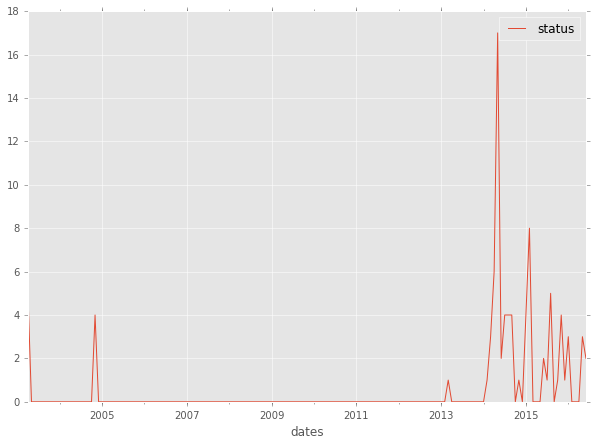

In [35]:
fig, ax = plt.subplots()
df_dates_fixed.resample('M').count().plot( y='status', figsize= (10,7), ax=ax)
#plt.savefig("project4_political_prisoners.pdf", transparent=True)

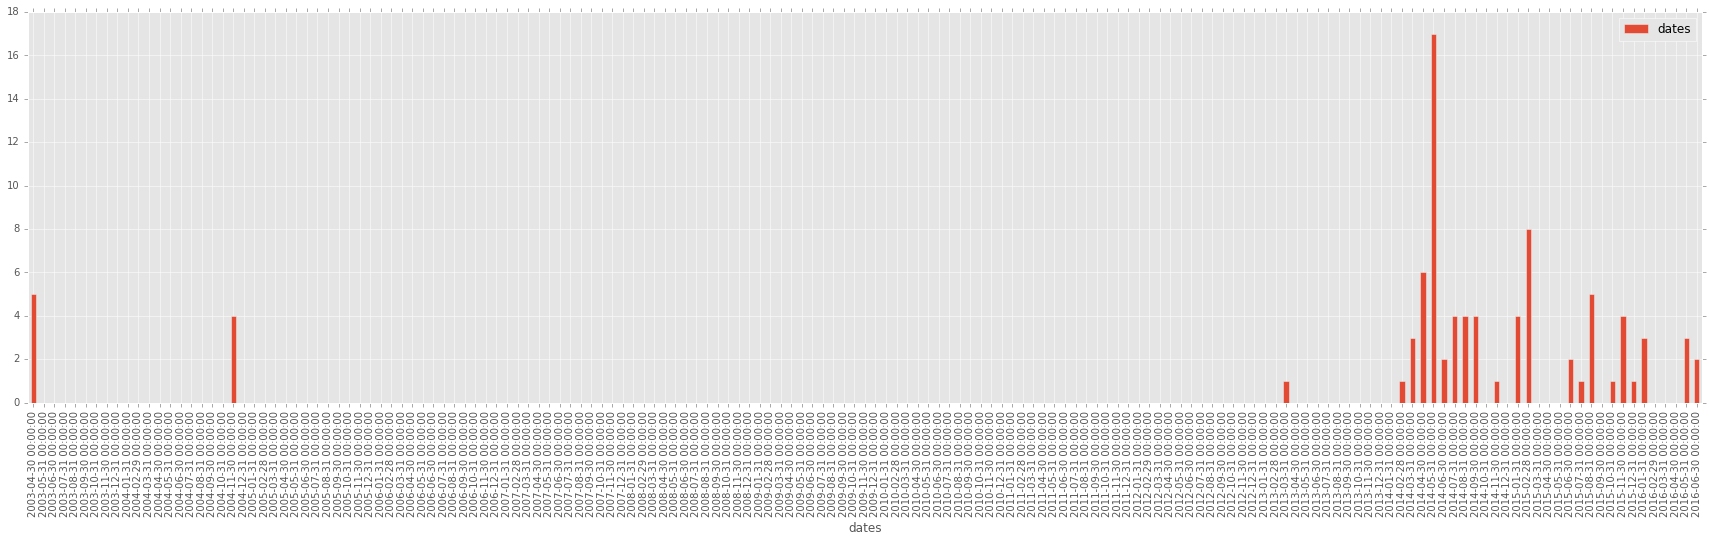

In [36]:
fig, ax = plt.subplots()
df_dates_fixed.resample('M').count().plot(kind='bar', y='dates', figsize= (30,7), ax=ax)
#plt.savefig("project4_political_prisoners_bar_chart.pdf", transparent=True)

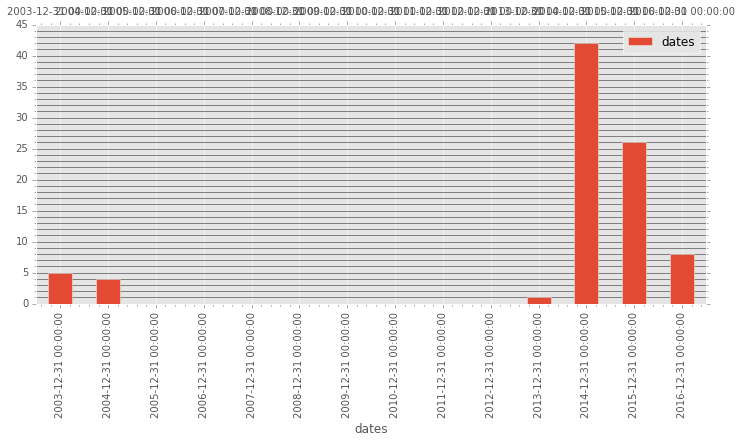

In [37]:
fig, ax = plt.subplots()
df_dates_fixed.resample('A').count().plot(kind='bar', y='dates', figsize= (12,5), ax=ax)
ax.yaxis.grid(which= 'major', color='grey', linestyle='-', linewidth=1)
ax.yaxis.grid(which= 'minor', color='grey', linestyle='-', linewidth=1)
plt.tick_params(which = 'major', top= 'on',right='on', bottom= 'on', labeltop= 'on', labelbottom= 'on', labelleft= 'on')
plt.tick_params(which = 'minor', top= 'on',right='on', bottom= 'on', labeltop= 'on', labelbottom= 'on', labelleft= 'on')
ax.minorticks_on()
#plt.savefig("project4_political_prisoners_bar_chart_anual.pdf", transparent=True)

In [38]:
df_dates_fixed

,dates,locations,professions,status
dates,,,,
2003-04-19,2003-04-19,Ramo Verde,Profesional,Condenado
2003-04-19,2003-04-19,Ramo Verde,Profesional,Condenado
2003-04-19,2003-04-19,Ramo Verde,Profesional,Condenado
2003-04-19,2003-04-19,Ramo Verde,Profesional,Condenado
2003-04-19,2003-04-19,Ramo Verde,Profesional,Condenado
2013-03-01,2013-03-01,Arresto Domiciliario,Profesional,Procesado
2014-02-18,2014-02-18,Ramo Verde,Profesional,Condenado
2014-03-19,2014-03-19,Arresto Domiciliario,Profesional,Procesado
2014-03-21,2014-03-21,Tocuyito,Profesional,Condenado


In [39]:
len(df_dates_fixed['2004'])

4

In [40]:
len(df_dates_fixed['2005'])

0

In [41]:
len(df_dates_fixed['2006'])

0

In [42]:
len(df_dates_fixed['2007'])

0

In [43]:
len(df_dates_fixed['2008'])

0

In [44]:
len(df_dates_fixed['2009'])

0

In [45]:
len(df_dates_fixed['2010'])

0

In [46]:
len(df_dates_fixed['2011'])

0

In [47]:
len(df_dates_fixed['2012'])

0

In [48]:
len(df_dates_fixed['2013'])

1

In [49]:
df_dates_fixed['2014']

,dates,locations,professions,status
dates,,,,
2014-02-18,2014-02-18,Ramo Verde,Profesional,Condenado
2014-03-19,2014-03-19,Arresto Domiciliario,Profesional,Procesado
2014-03-21,2014-03-21,Tocuyito,Profesional,Condenado
2014-03-21,2014-03-21,Tocuyito,Estudiante,Condenado
2014-04-02,2014-04-02,PolicÃ­a Militar Fuerte Tiuna,Militar,Condenado
2014-04-02,2014-04-02,CÃ¡rcel de Santa Ana,Militar,Condenado
2014-04-04,2014-04-04,Arresto Domiciliario,Profesional,Procesado
2014-04-12,2014-04-12,Arresto Domiciliario,Otro,Procesado
2014-04-22,2014-04-22,Arresto Domiciliario,Profesional,Procesado


In [50]:
len(df_dates_fixed['2015'])

26

In [51]:
len(df_dates_fixed['2016'])

8

In [52]:
len(df_dates_fixed)

86

In [53]:
df_dates_fixed['2016']

,dates,locations,professions,status
dates,,,,
2016-01-04,2016-01-04,Sebin Puerto Ayacucho,Profesional,Procesado
2016-01-06,2016-01-06,Sebin Puerto Ayacucho,Otro,Procesado
2016-01-31,2016-01-31,Sebin Helicoide,Estudiante,Procesado
2016-05-04,2016-05-04,Sebin Maracaibo,Otro,Procesado
2016-05-18,2016-05-18,Sebin Helicoide,Otro,Procesado
2016-05-19,2016-05-19,Sebin Helicoide,Profesional,Procesado
2016-06-19,2016-06-19,Penitenciaria 26 de julio,Profesional,Procesado
2016-06-19,2016-06-19,Penitenciaria 26 de julio,Profesional,Procesado


# Rule of law index 2015 data
I used the complete data to recreate a map, now I will use data of the countries that ranked the lowest in the index to compare Venezuela to the other 4. Comparison of each category

In [33]:
df_WJP = pd.read_excel("project_4_chart_2_last_5.xlsx")
df_WJP.head()

,Country,global rank,government powers,absence of corruption,open government,fundamental rights,order and security,regulatory enforcement,civil justice,criminal justice,overal score
0,Afghanistan,101/102,0.44,0.23,0.43,0.38,0.42,0.36,0.32,0.24,0.35
1,Cameroon,97/102,0.44,0.25,0.39,0.50,0.54,0.39,0.37,0.32,0.40
2,Pakistan,98/102,0.49,0.35,0.45,0.39,0.3,0.36,0.40,0.31,0.38
3,Venezuela,102/102,0.19,0.27,0.38,0.39,0.54,0.26,0.35,0.16,0.32
4,Zimbabwe,100/102,0.26,0.28,0.32,0.29,0.63,0.35,0.45,0.36,0.37


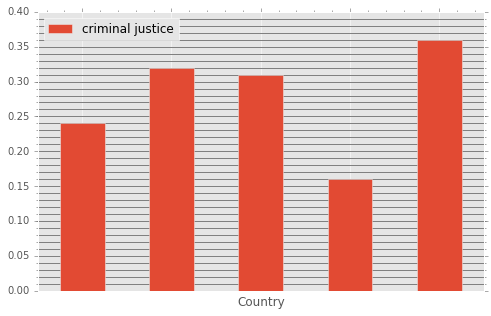

In [56]:
fig, ax = plt.subplots(figsize= (8,5))
df_WJP.plot(kind='bar', x='Country', y='criminal justice', ax=ax)
plt.savefig("project4_WJP_bottom_5.pdf", transparent=True)
ax.yaxis.grid(which= 'major', color='grey', linestyle='-', linewidth=1)
ax.yaxis.grid(which= 'minor', color='grey', linestyle='-', linewidth=1)
plt.tick_params(which = 'major', top= 'on',right='on', bottom= 'off', labeltop= 'off', labelbottom= 'off', labelleft= 'on')
plt.tick_params(which = 'minor', top= 'on',right='on', bottom= 'off', labeltop= 'off', labelbottom= 'off', labelleft= 'on')
ax.minorticks_on()
plt.savefig("project4_criminal_justice_scores.pdf", transparent=True)